In [49]:
# Install necessary libraries if you don't have them
# %pip install openmeteo-requests requests-cache statsmodels

In [51]:
# pip install retry-requests

In [53]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Acquire Lagos Weather Data
# Define API parameters for Lagos, Nigeria
latitude = 6.5244
longitude = 3.3792
start_date = "1980-01-01"
end_date = "2025-10-16" # Use current date

In [57]:
# Construct the API URL
url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}&"
    f"start_date={start_date}&end_date={end_date}&"
    f"daily=temperature_2m_mean,precipitation_sum"
)

# Fetch the data
response = requests.get(url)
data = response.json()

In [59]:
# Proces Data
# Convert to a Pandas DataFrame
df = pd.DataFrame(data['daily'])
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.rename(columns={'temperature_2m_mean': 'temperature', 'precipitation_sum': 'precipitation'}, inplace=True)


In [61]:
# Visualization
# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


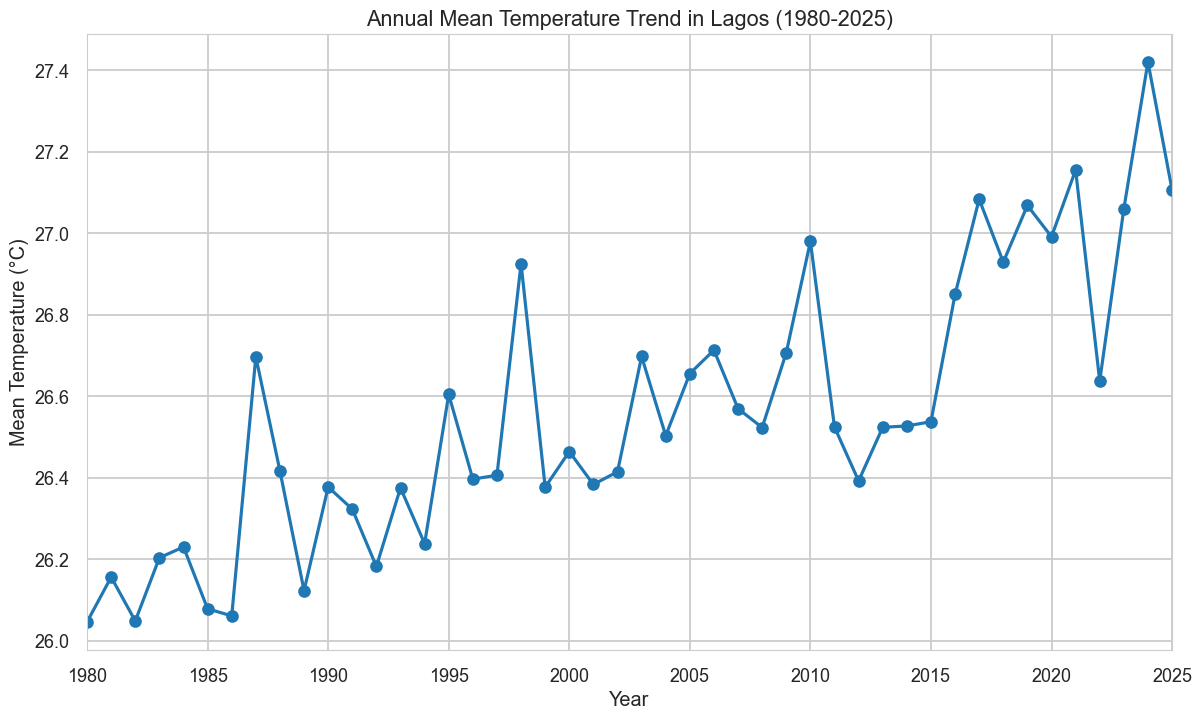

In [65]:
# Plot Annual Mean Temperature for Lagos
annual_temp = df['temperature'].resample('YE').mean()
plt.figure()
annual_temp.plot(title='Annual Mean Temperature Trend in Lagos (1980-2025)', marker='o', linestyle='-')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.savefig('annual_temp_trend.png')
plt.show()


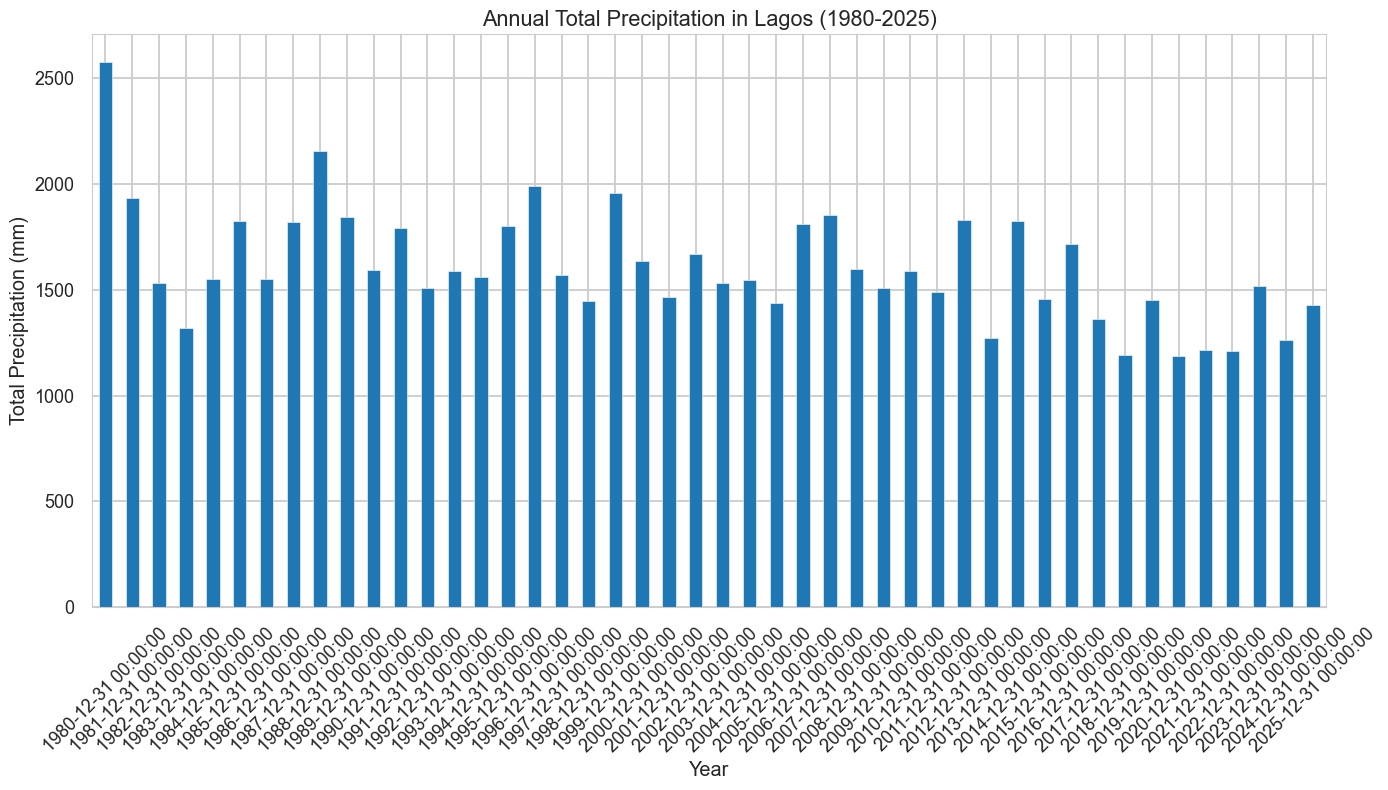

In [69]:
# Plot Lagos state Annual Total Precipitation
annual_precip = df['precipitation'].resample('YE').sum()
plt.figure()
annual_precip.plot(kind='bar', title='Annual Total Precipitation in Lagos (1980-2025)')
plt.ylabel('Total Precipitation (mm)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('annual_precip_trend.png')
plt.show()

In [71]:
# Plotting Seasonal Patterns (Monthly Boxplots)
df['month'] = df.index.month
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Temperature boxplot
sns.boxplot(x='month', y='temperature', data=df, ax=axes[0])
axes[0].set_title('Monthly Temperature Distribution in Lagos')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


C:\Users\New\AppData\Local\Temp\ipykernel_30260\3353254875.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

C:\Users\New\AppData\Local\Temp\ipykernel_30260\883111345.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


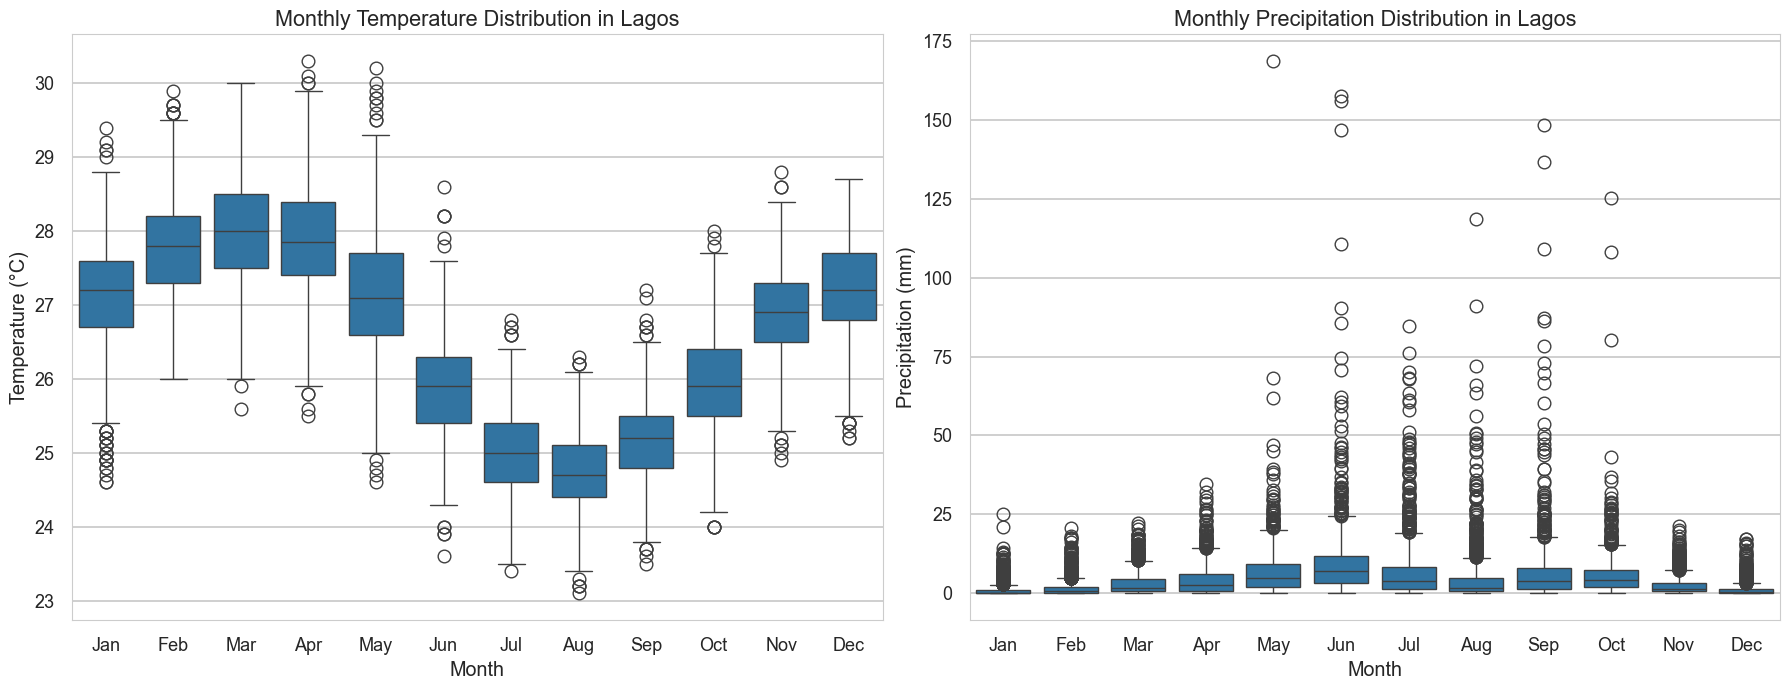

In [73]:
# Precipitation boxplot
sns.boxplot(x='month', y='precipitation', data=df, ax=axes[1])
axes[1].set_title('Monthly Precipitation Distribution in Lagos')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.savefig('seasonal_patterns.png')
plt.show()

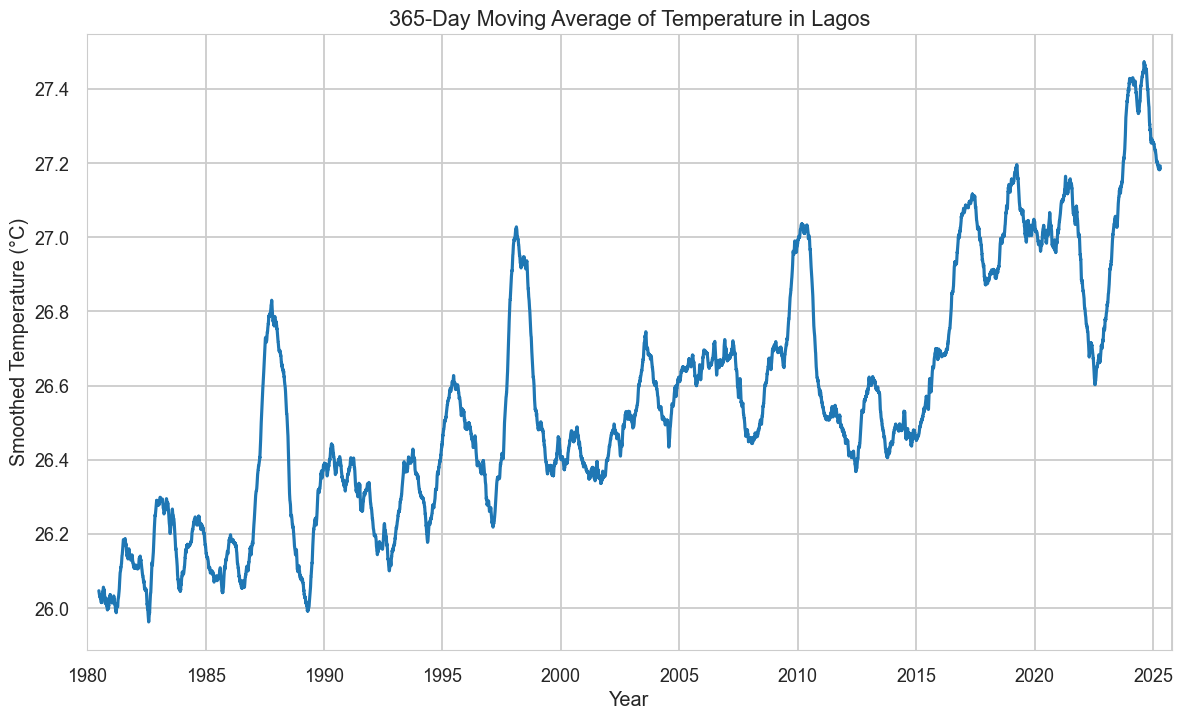

In [75]:
# Plot 4: Smoothed Daily Temperature (365-day moving average)
df['temp_moving_avg'] = df['temperature'].rolling(window=365, center=True).mean()
plt.figure()
df['temp_moving_avg'].plot(title='365-Day Moving Average of Temperature in Lagos')
plt.ylabel('Smoothed Temperature (°C)')
plt.xlabel('Year')
plt.savefig('smoothed_temp_trend.png')
plt.show()

***Analysis of 45 years of weather data for Lagos, Nigeria, revealed a clear and steady warming trend, with annual average temperatures consistently rising. While precipitation shows high year-to-year variability, the monthly analysis clearly identified the distinct dual-peak rainy season (peaking in June and October), providing a clear climatic profile.***